In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and setting up the datasets

In [2]:
df = pd.read_csv("cleaned_dataset.csv")

In [3]:
#setting pandas to show all columns of the dataframe without truncation
pd.set_option('display.max_columns', None)

In [4]:
#checking the main dataframe
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Time_bin,Manufactured_year,Age,Year_month,Date_time,Delay_status
0,2007,9,27,4,1104,1105,1243,1255,WN,110,N741SA,99.0,110.0,82.0,-12.0,-1.0,SEA,SMF,605,5,12,0,0,0,0,0,10am - 12pm,1998,9,2007-09,2007-09-27 11:05:00,0
1,2007,11,20,2,2120,2120,2255,2308,EV,4304,N355CA,95.0,108.0,67.0,-13.0,0.0,ATL,CLE,554,10,18,0,0,0,0,0,8pm - 10pm,2002,5,2007-11,2007-11-20 21:20:00,0
2,2007,7,16,1,1025,1030,1127,1133,OO,5799,N284YV,62.0,63.0,54.0,-6.0,-5.0,PDX,MFR,222,2,6,0,0,0,0,0,10am - 12pm,1994,13,2007-07,2007-07-16 10:30:00,0
3,2007,8,5,7,1448,1453,1529,1538,AQ,94,N837AL,41.0,45.0,32.0,-9.0,-5.0,HNL,KOA,163,2,7,0,0,0,0,0,2pm - 4pm,1985,22,2007-08,2007-08-05 14:53:00,0
4,2006,12,10,7,2027,1921,2235,2138,OO,6704,N943SW,68.0,77.0,55.0,57.0,66.0,DEN,LNK,423,3,10,0,0,0,0,57,6pm - 8pm,2003,3,2006-12,2006-12-10 19:21:00,1


In [5]:
#keeping only the neccessary column
q3 = df.loc[:, ['Year_month']]
q3.head()

,Year_month
0,2007-09
1,2007-11
2,2007-07
3,2007-08
4,2006-12


### Q3) How does the number of people flying between different locations change over time?

In [6]:
#checking for null values
q3.isnull().sum()

Year_month    0
dtype: int64

In [7]:
#checking the data type of the columns
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5750846 entries, 0 to 5750845
Data columns (total 1 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Year_month  object
dtypes: object(1)
memory usage: 43.9+ MB


In [8]:
#grouping the data according to the Year_Month and counting the number of flights in each Year_Month
grouped = q3.groupby("Year_month").size().reset_index().rename({0:"Count"}, axis = 1)
print(grouped)

   Year_month   Count
0     2006-01  209351
1     2006-02  191906
2     2006-03  221175
3     2006-04  214955
4     2006-05  221531
5     2006-06  221381
6     2006-07  229572
7     2006-08  234236
8     2006-09  218069
9     2006-10  228954
10    2006-11  220568
11    2006-12  225074
12    2007-01  224671
13    2007-02  220455
14    2007-03  267146
15    2007-04  260484
16    2007-05  269718
17    2007-06  264711
18    2007-07  275850
19    2007-08  278312
20    2007-09  258428
21    2007-10  271877
22    2007-11  262563
23    2007-12  259859


In [9]:
#getting a colour-blind friendly, colour palette
sns.reset_orig()
my_palette = sns.color_palette("colorblind")
plt.style.use('seaborn-colorblind')

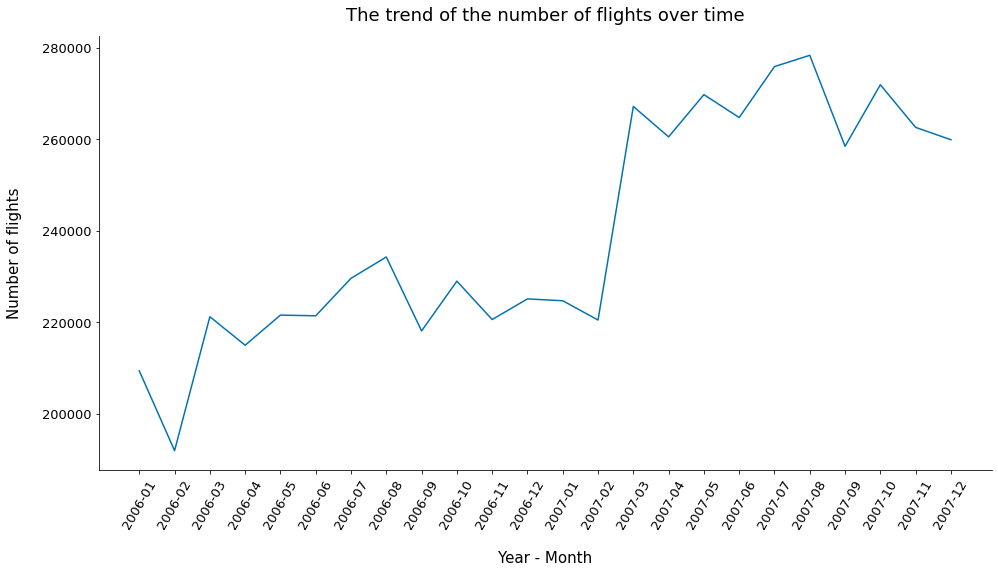

In [10]:
#plotting a time series graph to show the number of flights over time

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(grouped["Year_month"].astype(str), grouped["Count"], color = my_palette[0])

ax.set_ylabel("Number of flights", size = 15, labelpad = 20)
ax.set_xlabel("Year - Month", size = 15, labelpad = 20)

ax.set_title("The trend of the number of flights over time", size = 18, pad = 15)

ax.tick_params("y", labelsize=13)
ax.tick_params("x", rotation = 60, labelsize = 13)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Trend in python.png")
plt.show()